GPU mu kullanıyoruz ?

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Hangi GPU kullanıyoruz ?

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11006586081036718470, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11154422528
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12194638180067892018
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

IMDB Veri setini yüklemek

In [ ]:
from keras.datasets import imdb

In [ ]:
num_words = 10000
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words= num_words) ## en sık tekrar eden 10000 kelime

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print('train_data[0] = ',train_data[0]) ## cümleleri temsil eden vektör
print('train_labels[0] = ',train_labels[0]) ## olumlu olumsuz ==> 1, 0

train_data[0] =  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels[0] =  1


In [ ]:
word_index = imdb.get_word_index() ## kelimeleri bir tam sayı indekse eşleyen sözlüktür.
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) ## Tam sayı indeksleri kelimelere dönüştürür.

In [ ]:
## Kritikleri alır. İndeks değerlerini 3 atlayarak almakta çünkü 0, 1 ve 2 sırayla yapılan sıfır eklemelerini, dizinin başlangıcını ve bilinmeyenleri kodlamak için ayrılmıştır.
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

Verileri Hazırlamak

In [ ]:
import numpy as np

In [ ]:
## İçerisinde sayı bulunan listeleri sinir ağına gönderemeyiz. Listeleri tensöre dönüştürmeliyiz. 
## - Tüm elemanları aynı uzunlukta olacak şekilde eksikleri sıfırlar ile doldurun ve (samples, word_indices) şeklinde tam sayı tensörlerine dönüştürün.
## - Listenizi one-hot olarak kodlayın.
def vectorize_sequence(sequences, dimension = num_words):
  ## (len(sequences), dimension) şeklinde tüm elemanları sıfır olan matris oluşturulur.
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 ## results[i]' nin istenen indekslerini 1 yapar
  return results  

In [ ]:
## Yukardaki kodun çalışma mantığı için:
x_train = [[1,2,3],[4,5,6]]
result = np.zeros((len(x_train), 10))
print(result)
result[0,x_train[0]] = 1
result[1,x_train[1]] = 1
result

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [ ]:
x_train = vectorize_sequence(train_data,num_words) ## Eğitim vektör verisi
x_test = vectorize_sequence(test_data,num_words) ## Test vektör verisi

In [ ]:
x_train.shape[1]

10000

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Ağı İnşa etmek

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
## Relu aynı zamanda doğrusallığı bozan olarakda adlandırılır. output = dot(W, input) + b işlemindeki doğrusallığı bozar ve Derinsellik katar.

In [ ]:
## output = relu(dot(W, input) + bias) ==> 16 nöron bulunması W ağırlık matrisini (input_dimension, 16) şeklinde olması anlamına gelir.
## W matrisi ile iç çarpım(dot) işlemi girdi verilerini 16 boyutlu bir gösterim uzayına dönüştürür.  
model = Sequential()
model.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
model.add(Dense(16, activation= 'relu')) ## hidden2 katmanında 16 nöron
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## crossentropy Bilgi kuramından gelir ve olasılık dağılımları arasındaki uzaklığı ölçer, bizim durumumuzda ise tahminler ile olması gereken dağılım uzaklığını ölçer.
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Yaklaşımımızı Doğrulamak

In [ ]:
## Eğitim başarımını ölçmek için ağın daha önçe görmediği özgün veri setinden 10000 örnekden oluşan doğrulama(validation) veri seti oluştururuz.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Modeli Eğitmek

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5806 - accuracy: 0.7067 - val_loss: 0.3846 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3113 - accuracy: 0.9008 - val_loss: 0.2967 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2180 - accuracy: 0.9274 - val_loss: 0.3241 - val_accuracy: 0.8657
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1637 - accuracy: 0.9471 - val_loss: 0.2750 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1283 - accuracy: 0.9598 - val_loss: 0.3043 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1056 - accuracy: 0.9693 - val_loss: 0.2989 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0804 - accuracy: 0.9784 - val_loss: 0.3264 - val_accuracy: 0.8791
Epoch 8/20
30

In [ ]:
## model.fit() methodu History nesnesini döndürmektedir. Bu nesnein, eğitim boyunca neler olduğu bilgisini bulunduran history isimli bir elemanı bulunmaktadır.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

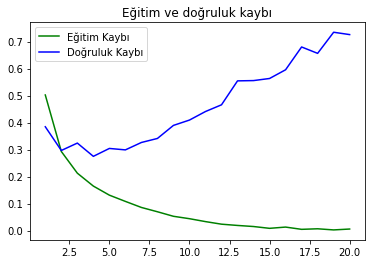

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

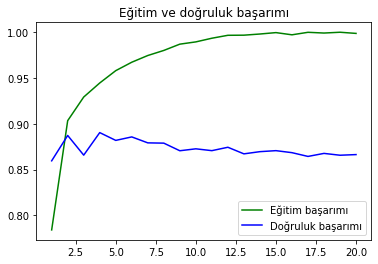

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'g', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7936 - accuracy: 0.8514


In [ ]:
## Model 3. Epokdan sonra overfitting e maruz kalıyor o yüzden epoch sayısını 3 yapabiliriz.

3 epoch Model

In [ ]:
Model = Sequential()
Model.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model.add(Dense(16, activation= 'relu')) ## hidden2 katmanında 16 nöron
Model.add(Dense(1, activation= 'sigmoid'))
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = Model.fit(partial_x_train,partial_y_train,epochs = 3, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/3
30/30 [==============================] - 2s 32ms/step - loss: 0.5944 - accuracy: 0.6811 - val_loss: 0.3813 - val_accuracy: 0.8767
Epoch 2/3
30/30 [==============================] - 1s 21ms/step - loss: 0.3267 - accuracy: 0.8992 - val_loss: 0.3136 - val_accuracy: 0.8777
Epoch 3/3
30/30 [==============================] - 1s 20ms/step - loss: 0.2279 - accuracy: 0.9267 - val_loss: 0.2768 - val_accuracy: 0.8923


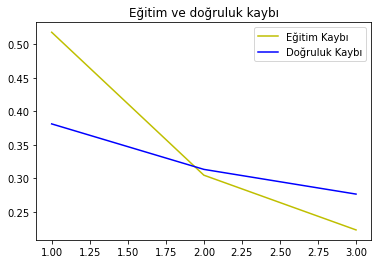

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

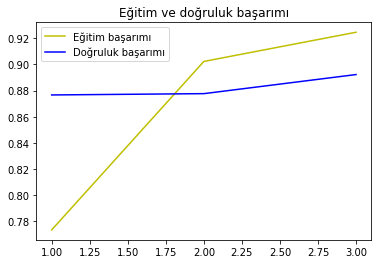

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result = Model.evaluate(x_test,y_test) ## Çokda bir fark olmadı :D

782/782 [==============================] - 2s 3ms/step - loss: 0.2943 - accuracy: 0.8840


Tahmin

In [ ]:
Model.predict(x_test)

array([[0.30825785],
       [0.9966203 ],
       [0.9295596 ],
       ...,
       [0.12147831],
       [0.20884362],
       [0.4831829 ]], dtype=float32)

İleri Gözlemler

- Bir Katman

In [ ]:
Model_one = Sequential()
Model_one.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_one.add(Dense(1, activation= 'sigmoid'))
Model_one.summary()

Model_one.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_one = Model_one.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5849 - accuracy: 0.7083 - val_loss: 0.4077 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3540 - accuracy: 0.8958 - val_loss: 0.3318 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2694 - accuracy: 0.9175 - val_loss: 0.2974 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2192 - accur

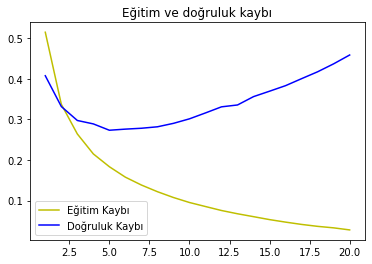

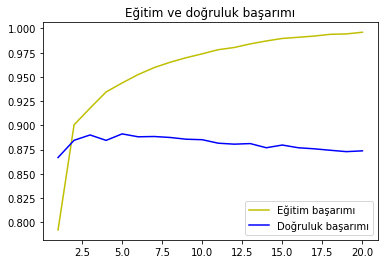

In [ ]:
import matplotlib.pyplot as plt

history_dict = history_one.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result_one = Model_one.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4925 - accuracy: 0.8590


- 3 Katman

In [ ]:
Model_three = Sequential()
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three.add(Dense(16, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three.add(Dense(1, activation= 'sigmoid'))
Model_three.summary()

Model_three.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_three = Model_three.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5936 - accuracy: 0.6978 - val_loss: 0.3864 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3085 - accuracy: 0.9074 - val_

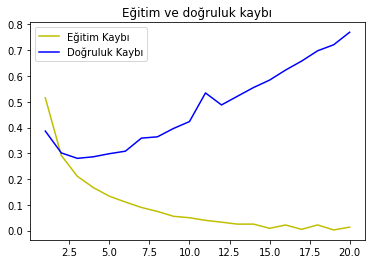

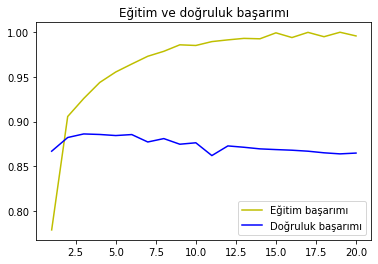

In [ ]:
history_dict = history_three.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result_three = Model_three.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8366 - accuracy: 0.8514


- 32 Nöron

In [ ]:
Model_three_two = Sequential()
Model_three_two.add(Dense(32, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_three_two.add(Dense(32, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_three_two.add(Dense(1, activation= 'sigmoid'))
Model_three_two.summary()

Model_three_two.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_three_two = Model_three_two.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5843 - accuracy: 0.6946 - val_loss: 0.3452 - val_accuracy: 0.8793
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2844 - accuracy: 0.9032 - val_loss: 0.3390 - val_accuracy: 0.8622
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2153 - accuracy: 0.92

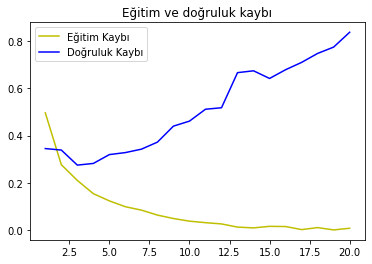

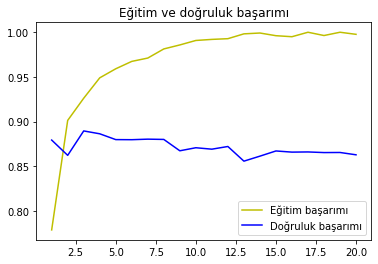

In [ ]:
history_dict = history_three_two.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result_three_two = Model_three_two.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9386 - accuracy: 0.8470


62 Nöron

In [ ]:
Model_six_four = Sequential()
Model_six_four.add(Dense(64, activation= 'relu', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_six_four.add(Dense(64, activation= 'relu', input_shape = (x_train.shape[1],)))
Model_six_four.add(Dense(1, activation= 'sigmoid'))
Model_six_four.summary()

Model_six_four.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_six_four = Model_six_four.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5696 - accuracy: 0.6935 - val_loss: 0.3198 - val_accuracy: 0.8773
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2582 - accuracy: 0.9071 - val_loss: 0.3026 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1893 - accuracy: 0.93

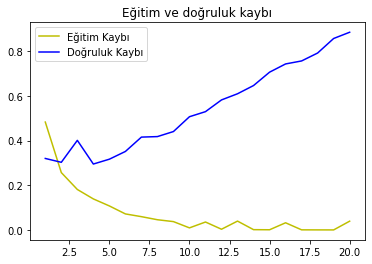

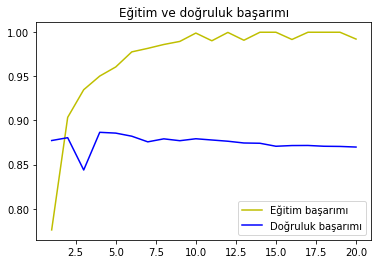

In [ ]:
history_dict = history_six_four.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result_six_four = Model_six_four.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9636 - accuracy: 0.8546


- Tanh

In [ ]:
Model_tanh = Sequential()
Model_tanh.add(Dense(16, activation= 'tanh', input_shape = (x_train.shape[1],))) ## hidden1 katmanında 16 nöron
Model_tanh.add(Dense(16, activation= 'tanh', input_shape = (x_train.shape[1],)))
Model_tanh.add(Dense(1, activation= 'sigmoid'))
Model_tanh.summary()

Model_tanh.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history_tanh = Model_tanh.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5663 - accuracy: 0.7063 - val_loss: 0.3670 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2898 - accuracy: 0.9077 - val_loss: 0.3072 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1965 - accuracy: 0.94

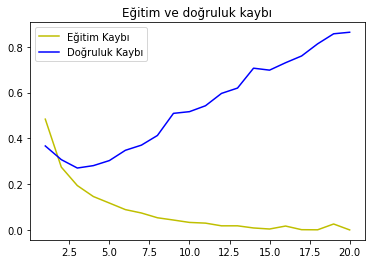

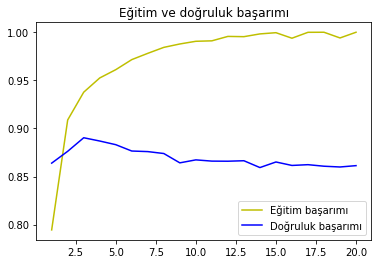

In [ ]:
history_dict = history_tanh.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'y', label = 'Eğitim Kaybı',)
plt.plot(epochs, val_loss_values, 'b', label = 'Doğruluk Kaybı',)
plt.title('Eğitim ve doğruluk kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, acc, 'y', label = 'Eğitim başarımı',)
plt.plot(epochs, val_acc, 'b', label = 'Doğruluk başarımı',)
plt.title('Eğitim ve doğruluk başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayıp'
plt.legend()

plt.show()

In [ ]:
result_tanh = Model_tanh.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.9537 - accuracy: 0.8435


In [ ]:
## epochs = 20 
## çıkış ==> loss, accuracy
print('result_one: ',result_one) ## tek hidden katmanlı 16 nöronlu 
print('result_Three: ',result_three) ## 3 hidden katmanlı 16 nöronlu
print('result_three_two: ',result_three_two) ## 2 hidden katmanlı 32 nöronlu
print('result_six_four: ',result_six_four) ## 2 hidden katmanlı 64 nöronlu
print('result_tanh: ',result_tanh) ## 2 hidden katmanlı 16 nöronlu aktivasyon func = tanh


result_one:  [0.49245840311050415, 0.858959972858429]
result_Three:  [0.8365976810455322, 0.8514000177383423]
result_three_two:  [0.938637912273407, 0.847000002861023]
result_six_four:  [0.9635728001594543, 0.854640007019043]
result_tanh:  [0.9537339806556702, 0.8434799909591675]
